## F1 state representation quality using multiple states  
Plot the state quality as a function of dimension K.

In [1]:
from bbvi_infer_2l import * 
from f1 import *
%matplotlib inline
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Read in saved performance metrics

In [2]:
## Our model
gsd1 = np.load('./saved2024/f12024GSD.npy')
gsd2 = np.load('./saved2024/f12024GSD2.npy')

In [3]:
gsd = np.vstack((gsd1, gsd2))
print(gsd)  # (5, 17)

[[0.3610425  0.65893024 0.71944468 0.64266246 0.62920535 0.63308066
  0.70100503 0.73775658 0.67396304]
 [0.49012009 0.57823013 0.42619879 0.48577634 0.32045822 0.4444681
  0.75577038 0.65739716 0.70952219]
 [0.54399114 0.32582404 0.55872583 0.42219572 0.71505834 0.57099055
  0.7578145  0.64623967 0.74299463]
 [0.32339664 0.46946597 0.59726599 0.49855208 0.72693978 0.69623541
  0.61851631 0.703475   0.73205008]
 [0.48794822 0.70432672 0.71199216 0.47423558 0.61809045 0.78230134
  0.57107572 0.64836896 0.72617324]]


In [4]:
slds1 = np.load('./saved2024/f12024SLDS.npy')
slds2 = np.load('./saved2024/f12024SLDS2.npy')

In [5]:
slds = np.vstack((slds1, slds2))
print(slds)  # (4, 17)

[[0.03560174 0.15910059 0.17779576 0.10914743 0.24929733 0.23362576
  0.27484882 0.44072055 0.36112767]
 [0.12196576 0.19329699 0.22983562 0.20475258 0.21275871 0.22966528
  0.35261051 0.16872498 0.37105017]
 [0.12196576 0.15445873 0.21948727 0.13993697 0.21889107 0.25117111
  0.23294438 0.27697811 0.24614598]
 [0.03560174 0.15910059 0.17779576 0.10914743 0.24929733 0.23362576
  0.27484882 0.44072055 0.36112767]
 [0.12196576 0.19329699 0.22983562 0.20475258 0.21275871 0.22966528
  0.35261051 0.16872498 0.37105017]]


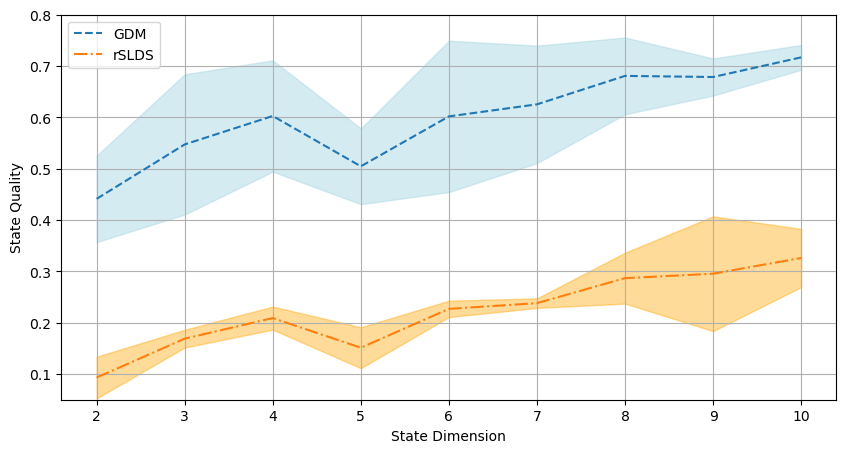

In [6]:
plt.figure(figsize=(10, 5))
mean_gsd = np.mean(gsd, axis=0)[0:9]
std_gsd = np.std(gsd, axis=0)[0:9]
mean_slds = np.mean(slds1, axis=0)[0:9]
std_slds = np.std(slds1, axis=0)[0:9]
steps = range(2,11)

plt.plot(steps, mean_gsd, linestyle="--", label="GDM")
plt.plot(steps, mean_slds, linestyle="-.", label="rSLDS")
plt.fill_between(
    steps, mean_gsd - std_gsd, mean_gsd + std_gsd,
    color="lightblue", alpha=0.5)
plt.fill_between(
    steps, mean_slds - std_slds, mean_slds + std_slds,
    color="orange", alpha=0.4)
plt.xlabel("State Dimension")
plt.ylabel("State Quality")
plt.ylim([0.05,0.8])
plt.legend()
plt.grid(True)
plt.show()